# Primera sesión:

En la primera sesión vamos a comparar el tiempo de ejecución en función del número de ciudades para el método exacto y el método del vecino más cercano.

In [1]:
import tsp
from time import time

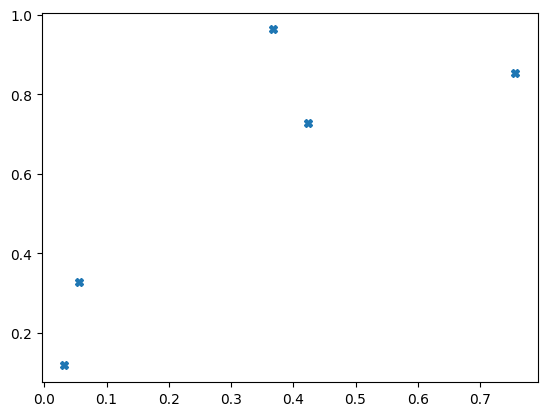

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X = []

for i in range (N):
    X.append(np.random.rand(2))

X = np.array(X)

plt.plot(X.T[0],X.T[1], 'X')
plt.show()

In [3]:
optimo, dist = tsp.TSP(X)

print("distancia=", dist)
print("optimo=", optimo)

distancia= 2.4041680738139584
optimo= [[0.03205536 0.11734901]
 [0.42368272 0.7269923 ]
 [0.75643502 0.85391138]
 [0.36674784 0.96261332]
 [0.05535576 0.32845991]
 [0.03205536 0.11734901]]


In [4]:
def t_ejecucion(n):
    X = []
    for i in range (n):
        X.append(np.random.rand(2))
    X = np.array(X)
    t0 = time()    
    tsp.TSP(X)
    t1 = time()
    return t1-t0

def t_2an(n):
    times = []
    for n in range(2,10):
        times.append(t_ejecucion(n))
        #print(f'{n}-> {times[-1]}')
    return times

def t_promedio(n, veces):
    times = []
    for n in range(veces):
        times.append(t_2an(n))
    times = np.array(times)
    return times.mean(axis=0)

In [14]:
times = []
for i in range(10):
    times.append(t_2an(4))
times = np.array(times)

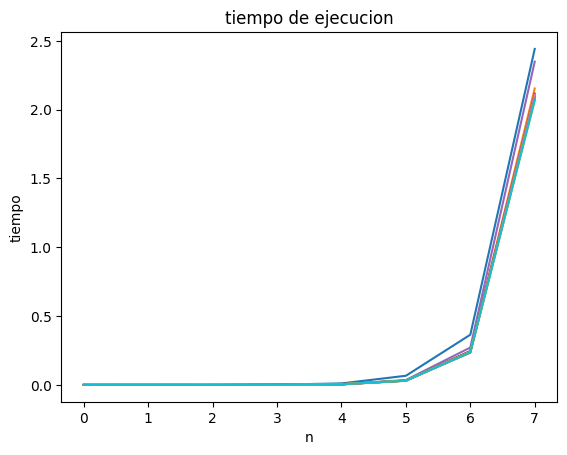

In [15]:
times_m = times.mean(axis=0)
plt.plot(times.T)
plt.xlabel("n")
plt.title("tiempo de ejecucion")
plt.ylabel("tiempo")
plt.show()


In [10]:
def time_vmc(n):
    times_vmc = []
    for j in range(2,n):
        X = []
        for i in range (j):
                X.append(np.random.rand(2))

        X = np.array(X)
        distancia_total, camino_aprox, tiempo = tsp.metodo_vecino_cercano(X)
        times_vmc.append(tiempo)
    return times_vmc

times_vmc = []
for i in range(2000):
    times_vmc.append(time_vmc(20))
times_vmc = np.array(times_vmc)
times_vmc_m = times_vmc.mean(axis=0)

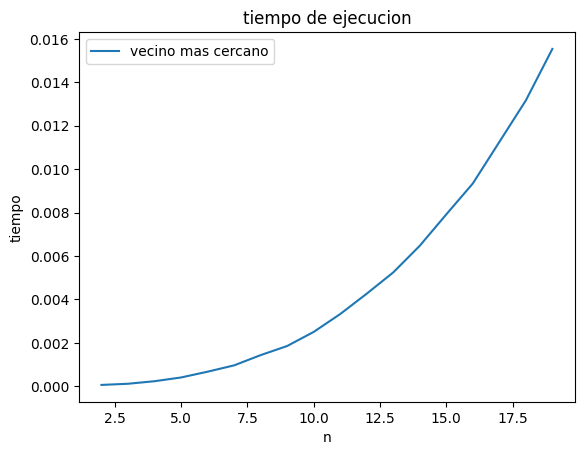

In [11]:
plt.plot(range(2,20), times_vmc_m, label="vecino mas cercano")
plt.xlabel("n")
plt.title("tiempo de ejecucion")
plt.ylabel("tiempo")
plt.legend()
plt.show()

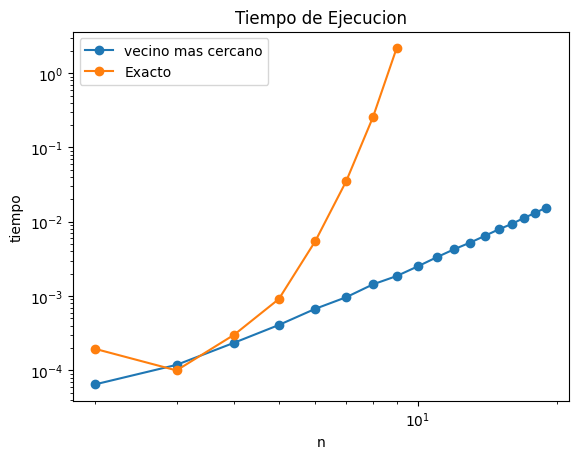

In [16]:
plt.plot(range(2,20),times_vmc_m[:],'-o', label="vecino mas cercano")
plt.plot(range(2,10), times_m,'-o', label="Exacto")
plt.yscale('log')
plt.xscale('log')

plt.xlabel("n")
plt.title("Tiempo de Ejecucion")
plt.ylabel("tiempo")
plt.legend()
plt.show()

# Sesion 2:

Ahora vamos a representar la solución del problema.

In [23]:
# Generamos las ciudades
np.random.seed(1234)
N = 9
X = []

for i in range (N):
    X.append(np.random.rand(2))

X = np.array(X)


In [24]:
# Sacamos la solución exacta
exact, dist = tsp.TSP(X)
# Sacamos la solución aproximada
dist_aprox, aprox, tiempo = tsp.metodo_vecino_cercano(X)

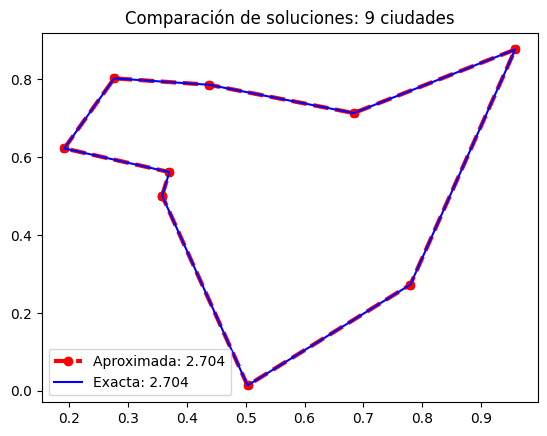

In [25]:
plt.plot(X.T[0],X.T[1], 'X')
plt.plot(aprox[:,0],aprox[:,1], 'o--r',linewidth=3,label=(f'Aproximada: {np.round(dist_aprox,3)}'))
plt.plot(exact[:,0],exact[:,1], 'b', label=(f'Exacta: {np.round(dist,3)}'))
plt.legend()
plt.title(f'Comparación de soluciones: {N} ciudades')
plt.show()